## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

(60000, 28, 28)
(60000,)
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       3       0       4       5       

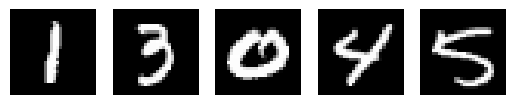

(60000,)


In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()
print(y_train.shape)

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images
x_train_flatten = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flatten = x_test.reshape(x_test.shape[0], 28 * 28)

# Number of validation samples
n_validation = 10000

# Check shapes before splitting
print("Before splitting:")
print("x_train_flatten:", x_train_flatten.shape)  # (60000, 784)
print("y_train:", y_train.shape)                  # (60000,)

# Split validation data (first 10,000)
x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

# Remaining 50,000 for training
x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

# Check shapes after splitting
print("After splitting:")
print("x_train_flatten:", x_train_flatten.shape)  # (50000, 784)
print("y_train:", y_train.shape)                  # (50000,)
print("x_validation:", x_validation.shape)        # (10000, 784)
print("y_validation:", y_validation.shape)        # (10000,)




Before splitting:
x_train_flatten: (60000, 784)
y_train: (60000,)
After splitting:
x_train_flatten: (50000, 784)
y_train: (50000,)
x_validation: (10000, 784)
y_validation: (10000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

y_train: (50000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


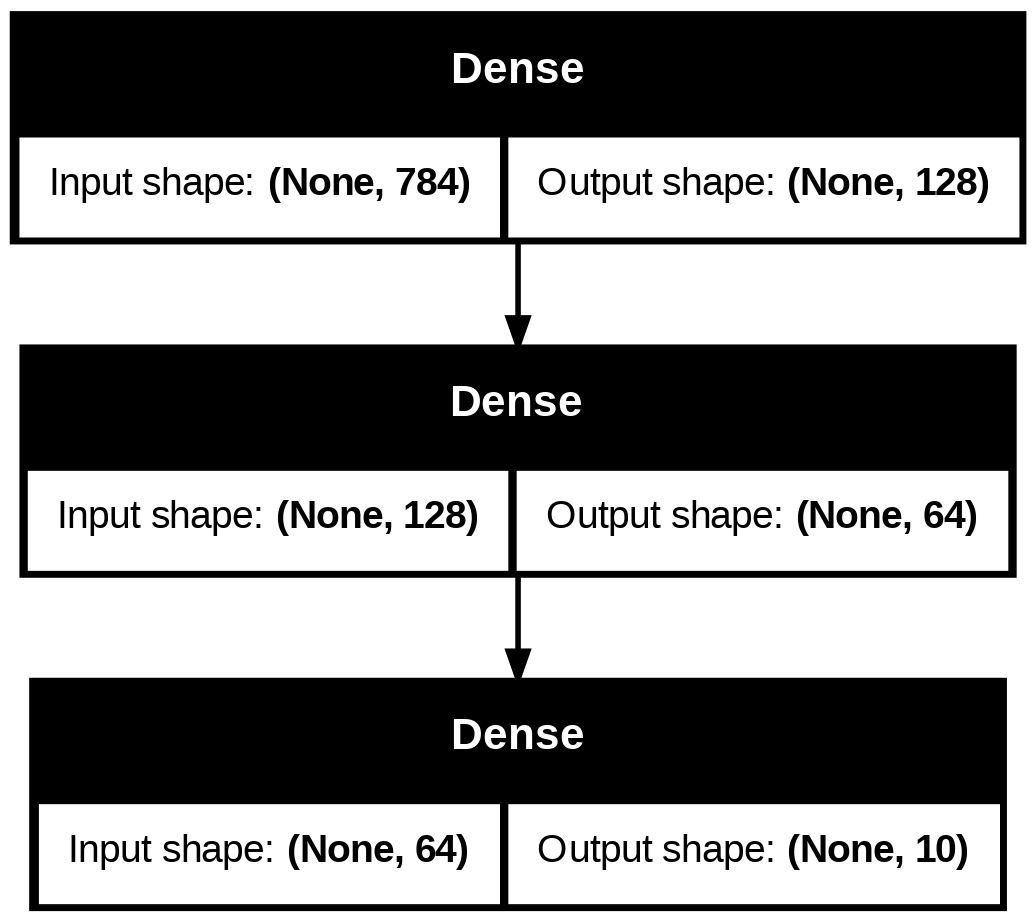

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple MLP model
model = keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
print("y_train:", y_train.shape)

# Make a graphical representation of the model
keras.utils.plot_model(model, show_shapes=True)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Set number of epochs
n_epochs = 10
batch_size = 512

# Train the model
history = model.fit(
    x_train_flatten, y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation)
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5888 - loss: 26.5983 - val_accuracy: 0.8697 - val_loss: 1.9840
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8890 - loss: 1.5449 - val_accuracy: 0.9015 - val_loss: 1.2595
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9150 - loss: 0.8682 - val_accuracy: 0.9152 - val_loss: 0.9578
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9331 - loss: 0.5693 - val_accuracy: 0.9196 - val_loss: 0.8457
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9445 - loss: 0.4296 - val_accuracy: 0.9212 - val_loss: 0.7413
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9519 - loss: 0.3340 - val_accuracy: 0.9301 - val_loss: 0.6586
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9600 - loss: 0.2326 - val_accuracy: 0.9316 - val_loss: 0.6208
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9642 - loss: 0.1976 - val_accuracy: 0.9355 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9321 - loss: 0.6495
Loss =  0.5484610795974731
Accuracy =  94.0999984741211 %


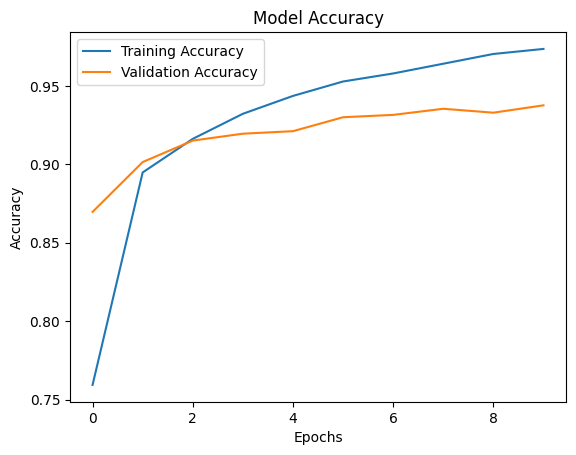

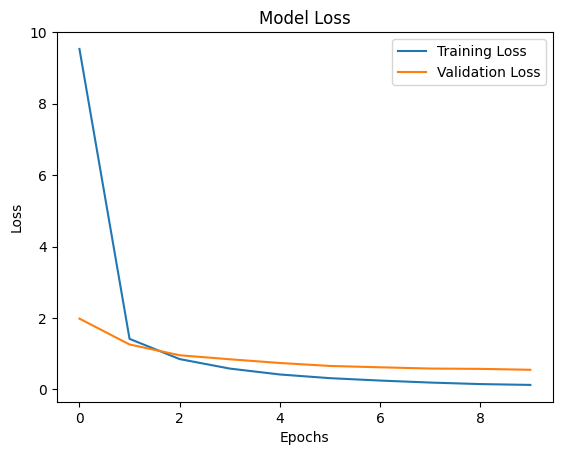

In [ ]:
# Evaluate on test data
results = model.evaluate(x_test_flatten, y_test)

# Print results
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")

import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



Lets show our results on images from testing dataset

Actual label: 2       2       1       5       3       

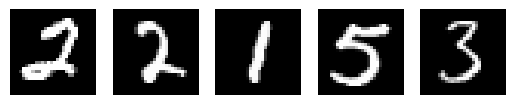

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5   # number of images to see predictions on

# Choose random indices from the test set
index = np.random.choice(x_test_flatten.shape[0], n)

print("Actual label: ", end="")

for i, ind in enumerate(index):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[ind], cmap="gray")  # Show original 28x28 test image
    plt.axis("off")
    print(y_test[ind], end="       ")

plt.show()

print("Predicted value: ", end="")

for ind in index:
    # Predict returns probabilities for each class
    preds = model.predict(x_test_flatten[ind].reshape(1, -1))  # reshape to (1, 784)
    digit = np.argmax(preds)  # Class with highest probability
    print(digit, end="       ")
